In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.shape

(1599, 12)

<AxesSubplot:>

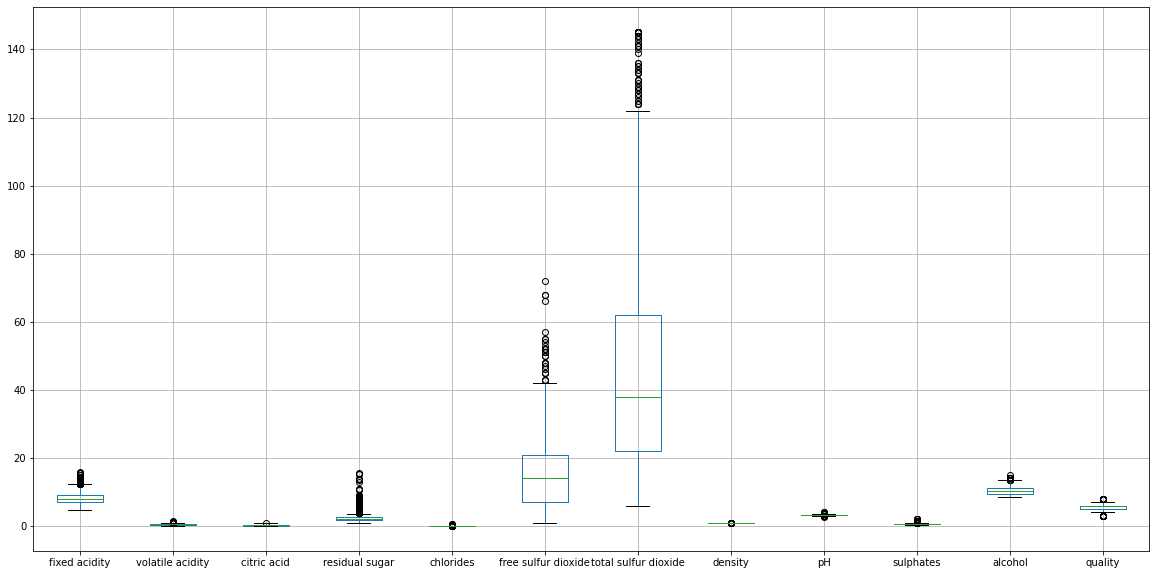

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
df.boxplot()

In [5]:
df['total sulfur dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [6]:
df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std()

145.15376580512842

In [7]:
df.loc[df['total sulfur dioxide']>145.15,'total sulfur dioxide']=145.15

In [8]:
df['total sulfur dioxide'].max()

145.15

In [24]:
df.shape

(1599, 12)

In [26]:
df1=df[:100]

In [28]:
x=df1.drop('quality',axis=1)
y=df1.quality

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=150,train_size=.80)

In [30]:
model=DecisionTreeClassifier()

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
model.score(x_test,y_test)

0.55

In [33]:
model.score(x_train,y_train)

1.0

[Text(0.25290697674418605, 0.9545454545454546, 'X[7] <= 0.994\ngini = 0.487\nsamples = 80\nvalue = [7, 55, 14, 4]'),
 Text(0.09302325581395349, 0.8636363636363636, 'X[2] <= 0.16\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1, 0]'),
 Text(0.046511627906976744, 0.7727272727272727, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.13953488372093023, 0.7727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.4127906976744186, 0.8636363636363636, 'X[10] <= 9.05\ngini = 0.441\nsamples = 76\nvalue = [4, 55, 13, 4]'),
 Text(0.23255813953488372, 0.7727272727272727, 'X[3] <= 3.15\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0]'),
 Text(0.18604651162790697, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.27906976744186046, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.5930232558139535, 0.7727272727272727, 'X[10] <= 9.65\ngini = 0.417\nsamples = 74\nvalue = [3, 55, 12, 4]'),
 Text(0.37209302325581395, 0.681818181

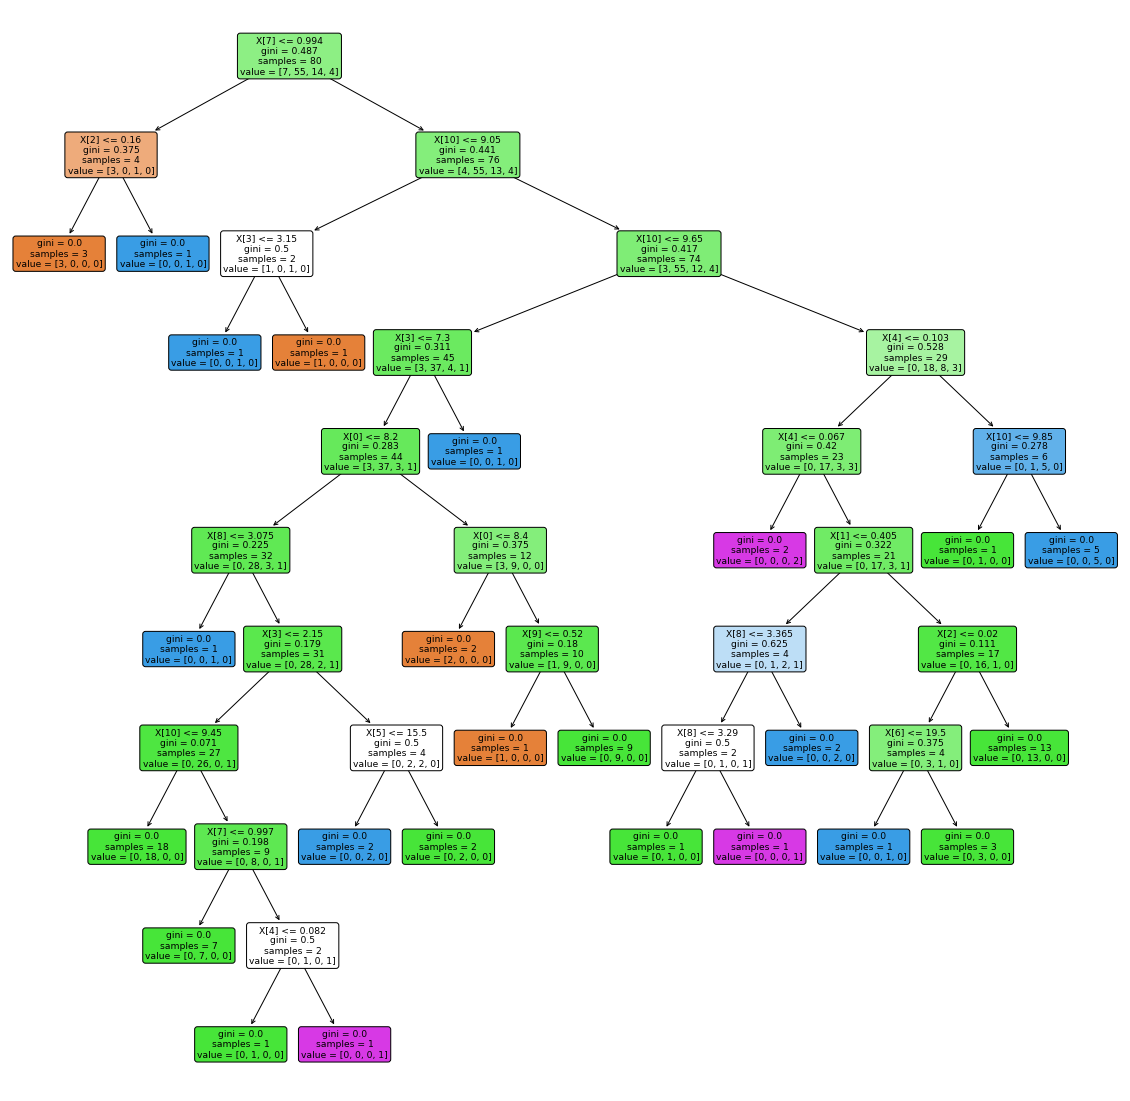

In [35]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True,rounded=True)

In [43]:
path=model.cost_complexity_pruning_path(x,y)

In [50]:
ccp_alphas=path['ccp_alphas']

In [51]:
models=[]
for path in ccp_alphas:
    md=DecisionTreeClassifier(ccp_alpha=path)
    md.fit(x_train,y_train)
    models.append(md)

In [53]:
score_train=[i.score(x_train,y_train) for i in models]

In [54]:
score_test=[i.score(x_test,y_test) for i in models]

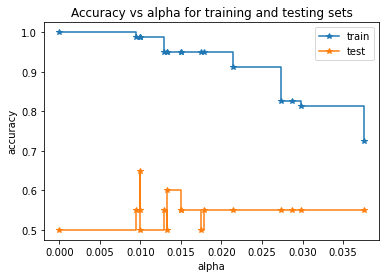

In [77]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,score_train, marker='*', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas,score_test, marker='*', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [78]:
final_model=DecisionTreeClassifier(ccp_alpha=.040)

In [79]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04)

In [80]:
final_model.score(x_test,y_test)

0.55

In [82]:
final_model.score(x_train,y_train)

0.725